In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas_datareader as pdr
import seaborn as sns
sns.set()

# 程式介紹：
股票除了觀察籌碼、技術面，最根本的基本面也是需要觀察的，而有些個股在營收不斷成長下，股價也會隨之攀升，<br>因此想藉由此程式來看是否真的營收成長的公司，股價也會成長，此程式忽略許多變數，也僅考量到一個月份的營收，未來可以加入營收的成長趨勢做分析。

## 讀入營收資料並加入上市上櫃的欄位

In [2]:
dfo=pd.read_csv("https://quality.data.gov.tw/dq_download_csv.php?nid=56510&md5_url=d2c72a0f58197aea9edbb2fab274325d")
df=pd.read_csv("https://quality.data.gov.tw/dq_download_csv.php?nid=18420&md5_url=cfee038a8a9009bf31df7b23328dcc3f")

In [3]:
df.insert(5,"上市櫃","上市")
dfo.insert(5,"上市櫃","上櫃")

## 簡單排出一些營建業因完工而營收暴漲（也就是選擇無備註的公司）

In [4]:
dfall=pd.concat([df,dfo])
dfsort=dfall[dfall.備註=='-'].sort_values(by=("營業收入-上月比較增減(%)" and "營業收入-去年同月增減(%)"),ascending=False)

In [5]:
dfsort.index=range(0,len(dfsort))

In [6]:
dfsort.head(10)

,出表日期,資料年月,公司代號,公司名稱,產業別,上市櫃,營業收入-當月營收,營業收入-上月營收,營業收入-去年當月營收,營業收入-上月比較增減(%),營業收入-去年同月增減(%),累計營業收入-當月累計營收,累計營業收入-去年累計營收,累計營業收入-前期比較增減(%),備註
0,108/11/16,108/10,8937,合騏,其他,上櫃,30917,20833,20776,48.403974,48.811128,270367,263915,2.444727,-
1,108/11/16,108/10,1786,科妍,生技醫療業,上市,38494,31461,25919,22.354661,48.516532,346556,253868,36.510312,-
2,108/11/16,108/10,6283,淳安,其他電子業,上市,183263,100097,123503,83.085407,48.387489,1010958,905927,11.593760,-
3,108/11/16,108/10,3611,鼎翰,電腦及週邊設備業,上櫃,533117,500014,361238,6.620415,47.580542,4799488,3224874,48.827148,-
4,108/11/16,108/10,2543,皇昌,建材營造,上市,536266,513385,363430,4.456889,47.556889,4455236,3636821,22.503582,-
5,108/11/16,108/10,3546,宇峻,文化創意業,上櫃,113968,131525,77902,-13.348793,46.296629,949202,952654,-0.362356,-
6,108/11/16,108/10,4167,展旺,生技醫療業,上櫃,133827,103222,91879,29.649687,45.655699,1076896,946066,13.828845,-
7,108/11/16,108/10,5259,奕智博,光電業,上市,11200,14884,7713,-24.751411,45.209387,67238,118929,-43.463747,-
8,108/11/16,108/10,3706,神達,電腦及週邊設備業,上市,3242479,2819032,2233384,15.021007,45.182333,28754946,25781074,11.535097,-
9,108/11/16,108/10,3209,全科,電子通路業,上市,4332301,3574296,3003379,21.207113,44.247562,32375894,26387484,22.694130,-


## 利用`pandas datareader` 讀取股價

In [7]:
code=[]
for i in range(0,9):
    if dfsort.上市櫃[i]=="上市":
        code.append(f"{dfsort.公司代號[i]}.tw")
    else:
        code.append(f"{dfsort.公司代號[i]}.two")

In [8]:
price={}
for i in range(0,(len(code))):
    price[code[i]]=pdr.DataReader(code[i],"yahoo",start="2019-09-01")



## 加入漲跌幅

In [10]:
for key in code:
    d1=price[key]["Adj Close"][:69].values
    d2=price[key]["Adj Close"][1:70].values
    e=((d2-d1)/d1)*100
    e=np.insert(e,0,0)
    price[key]["漲跌幅(%)"]=e

##  開始繪圖
因前一個月的財報通常都在每月10號前公布，因此用底色畫出財報公佈的日子

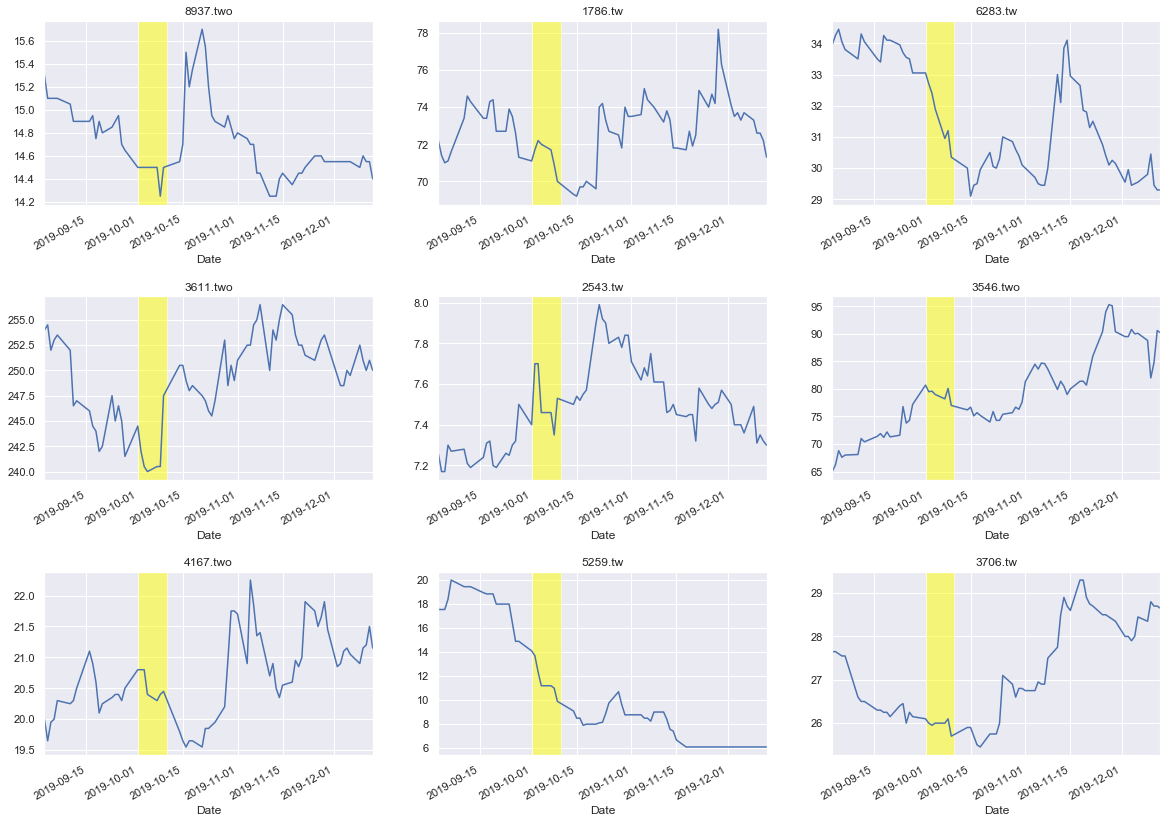

In [11]:
plt.figure(figsize=(20,15))#調整圖的大小
for i in range(0,9):
    plt.subplot(330+i+1) #繪製在第幾個圖
    price[code[i]]["Adj Close"].plot(title=code[i]) #加入title
    plt.axvspan("2019-10-01","2019-10-10", facecolor='yellow', alpha=0.5) #標底色
plt.subplots_adjust(hspace=0.5)#調整上下間距

# 小結論
從以上圖表可看出不見得財報營收成長很多，股價就會隨之攀升很多，因為以上選出的股票都是本月營收成長最多的股票<br>
而顯示出此狀況的原因可能為資料不夠充分或是有消息面、技術面、籌碼面的影響。

## 額外：
看看股價上漲的日子在何時（以上圖上漲幅度的圖來觀察）

In [21]:
def Color(val):
    if val<0:
        color='green' 
    elif val>0:
        color="red"
    else:
        color='black'
    return "color:%s" %color

In [22]:
price["3611.two"].style.applymap(Color,subset=["漲跌幅(%)"])

,High,Low,Open,Close,Volume,Adj Close,漲跌幅(%)
Date,,,,,,,
2019-09-02 00:00:00,255,252.5,254.5,254,34259,254,0
2019-09-03 00:00:00,256.5,254.5,254.5,254.5,32941,254.5,0.19685
2019-09-04 00:00:00,254.5,252,254,252,38642,252,-0.982318
2019-09-05 00:00:00,253.5,251.5,253.5,253,62426,253,0.396825
2019-09-06 00:00:00,254.5,252.5,254,253.5,31650,253.5,0.197628
2019-09-10 00:00:00,257,251.5,253,252,148410,252,-0.591716
2019-09-11 00:00:00,253.5,245,253.5,246.5,206947,246.5,-2.18254
2019-09-12 00:00:00,248.5,246,246.5,247,65350,247,0.20284
2019-09-16 00:00:00,247.5,246,247.5,246,26463,246,-0.404858
